In [12]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
#from sklearn.cross_validation import ShuffleSplit
#%matplotlib inline
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['housing.csv']


In [13]:
import numpy as np
import pandas as pd
import seaborn as sns
df=pd.read_csv('../input/housing.csv',sep=",")

**EXPLORATORY DATA ANALYSIS**


In [14]:
df.head()

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0
3,6.998,2.94,18.7,701400.0
4,7.147,5.33,18.7,760200.0


Checking for null values

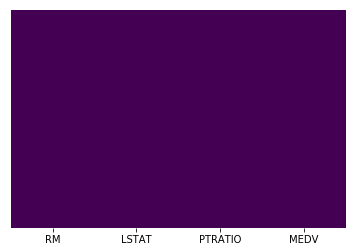

In [15]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap = 'viridis')

Describing housing Data

In [16]:
df.describe()

,RM,LSTAT,PTRATIO,MEDV
count,489.000000,489.000000,489.000000,4.890000e+02
mean,6.240288,12.939632,18.516564,4.543429e+05
std,0.643650,7.081990,2.111268,1.653403e+05
min,3.561000,1.980000,12.600000,1.050000e+05
25%,5.880000,7.370000,17.400000,3.507000e+05
50%,6.185000,11.690000,19.100000,4.389000e+05
75%,6.575000,17.120000,20.200000,5.187000e+05
max,8.398000,37.970000,22.000000,1.024800e+06


Visualization

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/opt/conda/lib/python3.6/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


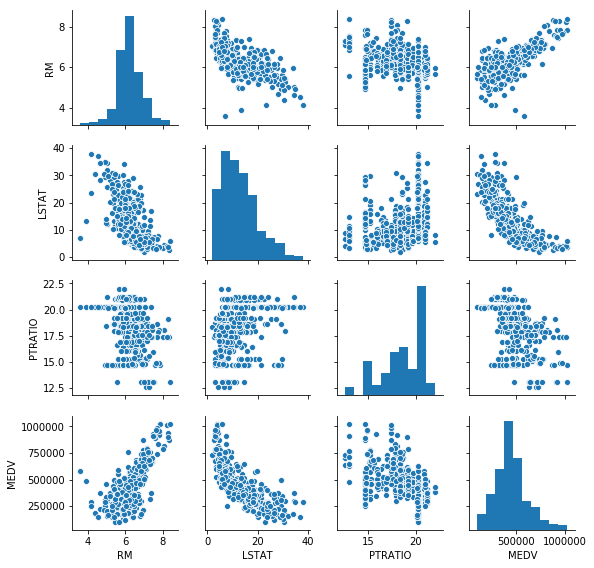

In [19]:
sns.pairplot(df,size=2)

**Feature Observation**: As a reminder, we are using three features from the Boston housing dataset: 'RM', 'LSTAT', and 'PTRATIO'. For each data point (neighborhood):

'**RM**' is the average number of rooms among homes in the neighborhood. '**LSTAT**' is the percentage of homeowners in the neighborhood considered "lower class" (working poor). '**PTRATIO**' is the ratio of students to teachers in primary and secondary schools in the neighborhood

**Correlation Analysis** for feature selection

In [20]:
df.corr()  #for finding best feature

,RM,LSTAT,PTRATIO,MEDV
RM,1.000000,-0.612033,-0.304559,0.697209
LSTAT,-0.612033,1.000000,0.360445,-0.760670
PTRATIO,-0.304559,0.360445,1.000000,-0.519034
MEDV,0.697209,-0.760670,-0.519034,1.000000


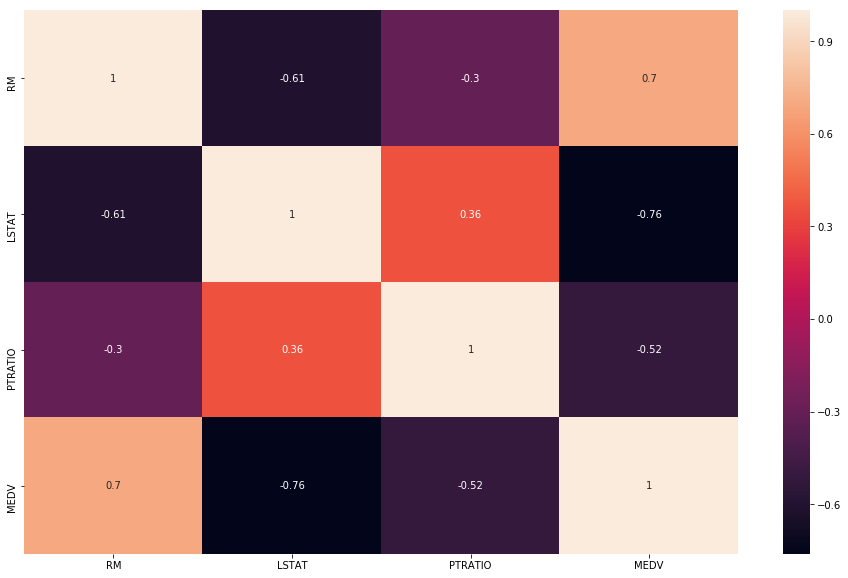

In [21]:
plt.figure(figsize=(16,10))
sns.heatmap(df.corr(),annot=True);

Since the main goal of this project is to construct a working model which has the capability of predicting the value of houses, we will need to separate the dataset into features and the target variable.
The features, 'RM', 'LSTAT','PTRATIO', give us quantitative information about each data point,they are stored in 'X' variable. The target variable, 'MEDV', will be the variable we seek to predict. These are stored in 'y' variable.

In [24]:
X = df[['LSTAT','RM','PTRATIO']] #select feature
y = df[['MEDV']].values   #select target var
y = y.reshape(-1,1)


**Applying Scikit learn Linear Regression based on 3 independent columns 'RM','LSAT','PTRATIO'
to predict value of dependent variable 'MEDV'**

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [29]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state=42)

In [30]:
#create linear regression object
lm = LinearRegression()  

In [31]:
#train the model using training set
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [33]:
#make prediction using the training set first
y_train_pred = lm.predict(X_train)
y_test_pred = lm.predict(X_test)

In [34]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

#the mean squared error,lower the value better, if it is a .0 means perfect prediction
s = mean_squared_error(y_train,y_train_pred)
print("Mean Squared error of training set :%2f"%s)

Mean Squared error of training set :8031222777.185911


In [35]:
#the mean squared error,lower the value better it is .0 means perfect prediction
s = mean_squared_error(y_test,y_test_pred)
print("Mean squared error of testing set: %.2f"%s)

Mean squared error of testing set: 7048219280.22


In [36]:
from sklearn.metrics import r2_score

# Explained variance score: 1 is perfect prediction
s = r2_score(y_train, y_train_pred)
print('R2 variance score of training set: %.2f' %s )

R2 variance score of training set: 0.72


In [37]:
#explained the variance score :1 is perfect prediction
s = r2_score(y_test,y_test_pred)
print("R2 variance score of testing set: %2f"%s)

R2 variance score of testing set: 0.691005


In [38]:
#calculating adjusted r2
N = y_test.size
p = X_train.shape[1]
adjr2score = 1 - ((1-r2_score(y_test, y_test_pred))*(N - 1))/ (N - p - 1)
print("Adjusted R^2 Score %.2f" % adjr2score)

Adjusted R^2 Score 0.68


**Polynomial Regression**

In [39]:
#import polynomial package
from sklearn.preprocessing import PolynomialFeatures

In [40]:
#creat a polynomial regression model for the given degree=2
poly_reg = PolynomialFeatures(degree = 2)

In [41]:
#transform the existing feature to high degree features.
X_train_poly = poly_reg.fit_transform(X_train)
X_test_poly = poly_reg.fit_transform(X_test)

In [42]:
#fit the transform features to linear regression
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_train_poly,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [44]:
#predicting on training data set 
y_train_predict = lin_reg_2.predict(X_train_poly)
#predicting on testing data set
y_test_predict = lin_reg_2.predict(X_test_poly)

In [45]:
#evaluating the model on train dataset
rmse_train = np.sqrt(mean_squared_error(y_train,y_train_predict))
r2_train = r2_score(y_train,y_train_predict)
print("The model performance of training set")
print("---------------------------------------------")
print("RMSE of training set is{}".format(rmse_train))
print("R2 score of training set is{}".format(r2_train))

The model performance of training set
---------------------------------------------
RMSE of training set is68920.99023260795
R2 score of training set is0.8355858250276694


In [46]:
#evaluating model on test dataset
rmse_test = np.sqrt(mean_squared_error(y_test,y_test_predict))
r2_test = r2_score(y_test,y_test_predict)

print("The model performance of training set")
print("-----------------------------------------------")
print("RMSE of testing set is{}".format(rmse_test))
print("R2 score of testing set is{}".format(r2_test))

The model performance of training set
-----------------------------------------------
RMSE of testing set is62384.1661367507
R2 score of testing set is0.8293837402027118


**Quadratic**

In [48]:
#import polynomial package
from sklearn.preprocessing import PolynomialFeatures

In [49]:
#creat a polynomial regression model for the given degree=3
poly_reg = PolynomialFeatures(degree = 3)

In [50]:
#transform the existing feature to high degree features.
X_train_poly = poly_reg.fit_transform(X_train)
X_test_poly = poly_reg.fit_transform(X_test)

In [51]:
#fit the transform features to linear regression
lin_reg_3 = LinearRegression()
lin_reg_3.fit(X_train_poly,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [52]:
#predicting on training data set 
y_train_predict = lin_reg_3.predict(X_train_poly)
#predicting on testing data set
y_test_predict = lin_reg_3.predict(X_test_poly)

In [53]:
#evaluating the model on train dataset
rmse_train = np.sqrt(mean_squared_error(y_train,y_train_predict))
r2_train = r2_score(y_train,y_train_predict)
print("The model performance of training set")
print("----------------------------------------------")
print("RMSE of training set is{}".format(rmse_train))
print("R2 score of training set is{}".format(r2_train))

The model performance of training set
----------------------------------------------
RMSE of training set is66301.48706859568
R2 score of training set is0.8478462085483496


In [54]:
#evaluating model on test dataset
rmse_test = np.sqrt(mean_squared_error(y_test,y_test_predict))
r2_test = r2_score(y_test,y_test_predict)

print("The model performance of testing set")
print("--------------------------------------------")
print("RMSE of testing set is{}".format(rmse_test))
print("R2 score of testing set is{}".format(r2_test))

The model performance of testing set
--------------------------------------------
RMSE of testing set is62754.74069898846
R2 score of testing set is0.8273507296661979


**Applying Gradient Descent**

In [55]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()
X_std = sc_x.fit_transform(X)
y_std = sc_y.fit_transform(y.reshape(-1,1)).flatten()

In [56]:
X_std.shape

(489, 3)

In [57]:
import numpy as np
alpha = 0.0001    #learning rate
w_ = np.zeros(1 + X_std.shape[1])    
cost_ = [] 
n_ = 100
 
for i in range(n_):
    y_pred = np.dot(X_std,w_[1:] + w_[0])
    errors  = (y_std - y_pred)
    
    w_[1:] +=alpha * X_std.T.dot(errors)   #theta1
    w_[0] +=alpha *errors.sum()        #theta0
    
    cost = (errors**2).sum() / 2.0
    cost_.append(cost)

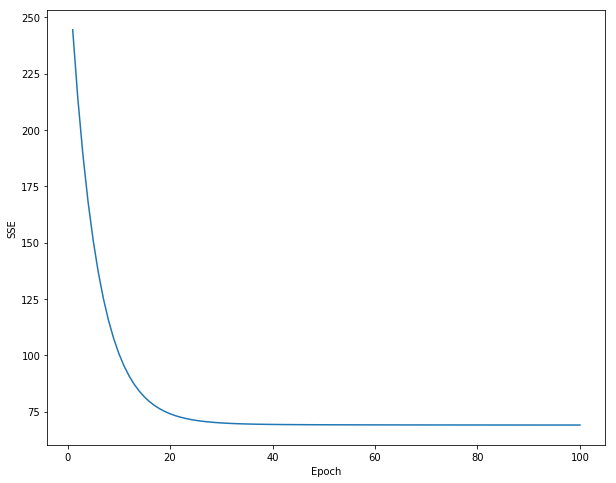

In [58]:
plt.figure(figsize=(10,8))  #plot the figure
plt.plot(range(1,n_ + 1),cost_);
plt.ylabel('SSE');
plt.xlabel('Epoch');

In [59]:
w_   #gradient function (intercept and coeficient) 

array([ 2.89439583e-15, -4.54897201e-01,  3.45402065e-01, -2.50972706e-01])

In [60]:
#accuracy of gradient function
print("Accuracy: %0.2f (+/- %0.2f)" % (w_.mean(), w_.std() * 2))

Accuracy: -0.09 (+/- 0.60)
